CSCI 5525 project 

1.PCA - did not continue
2.SMOTE - modified Xtrain
3.RF
4.GNB
5.XGBOOST
6.LDA
7.KNN

#Data importing and preprocessing

In [ ]:
import shutil
import os
from tqdm import tqdm
from urllib.request import urlretrieve

class TqdmUpTo(tqdm):
    def update_to(self, b=1, bsize=1, tsize=None):
        if tsize is not None:
            self.total = tsize
        self.update(b * bsize - self.n)


def download_url(url, filepath):
    directory = os.path.dirname(os.path.abspath(filepath))
    os.makedirs(directory, exist_ok=True)
    if os.path.exists(filepath):
        print("File exists!!!")
        return

    with TqdmUpTo(unit="B", unit_scale=True, unit_divisor=1024, miniters=1, desc=os.path.basename(filepath)) as t:
        urlretrieve(url, filename=filepath, reporthook=t.update_to, data=None)
        t.total = t.n


def extract_archive(filepath):
    extract_dir = os.path.dirname(os.path.abspath(filepath))
    shutil.unpack_archive(filepath, extract_dir)

In [ ]:
# #there is something wrong with this. The direct download file seems to corrupted (idk why). Skips this cell and upload directly from your PC for now

# dataset_directory = '/content/'

# filepath = os.path.join(dataset_directory, "archive.zip")
# download_url(
#     url="https://www.kaggle.com/datasets/adityakadiwal/water-potability/download",
#     filepath=filepath,
# )


In [ ]:
from google.colab import files
files.upload()

!unzip /content/archive.zip

Saving archive.zip to archive.zip
Archive:  /content/archive.zip
  inflating: water_potability.csv    


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/water_potability.csv')

In [ ]:
data

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


In [ ]:
data.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [ ]:
data.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [ ]:
data_no_null_columns = data.dropna(axis = 1)

In [ ]:
data_no_null_columns

,Hardness,Solids,Chloramines,Conductivity,Organic_carbon,Turbidity,Potability
0,204.890455,20791.318981,7.300212,564.308654,10.379783,2.963135,0
1,129.422921,18630.057858,6.635246,592.885359,15.180013,4.500656,0
2,224.236259,19909.541732,9.275884,418.606213,16.868637,3.055934,0
3,214.373394,22018.417441,8.059332,363.266516,18.436524,4.628771,0
4,181.101509,17978.986339,6.546600,398.410813,11.558279,4.075075,0
...,...,...,...,...,...,...,...
3271,193.681735,47580.991603,7.166639,526.424171,13.894419,4.435821,1
3272,193.553212,17329.802160,8.061362,392.449580,19.903225,2.798243,1
3273,175.762646,33155.578218,7.350233,432.044783,11.039070,3.298875,1
3274,230.603758,11983.869376,6.303357,402.883113,11.168946,4.708658,1


In [ ]:
data_no_null_rows = data.dropna()

In [ ]:
data_no_null_rows

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
...,...,...,...,...,...,...,...,...,...,...
3267,8.989900,215.047358,15921.412018,6.297312,312.931022,390.410231,9.899115,55.069304,4.613843,1
3268,6.702547,207.321086,17246.920347,7.708117,304.510230,329.266002,16.217303,28.878601,3.442983,1
3269,11.491011,94.812545,37188.826022,9.263166,258.930600,439.893618,16.172755,41.558501,4.369264,1
3270,6.069616,186.659040,26138.780191,7.747547,345.700257,415.886955,12.067620,60.419921,3.669712,1


In [ ]:
data_no_null_columns.columns

Index(['Hardness', 'Solids', 'Chloramines', 'Conductivity', 'Organic_carbon',
       'Turbidity', 'Potability'],
      dtype='object')

In [ ]:
l_train = data_no_null_rows[data_no_null_columns.columns]

In [ ]:
l_train

,Hardness,Solids,Chloramines,Conductivity,Organic_carbon,Turbidity,Potability
3,214.373394,22018.417441,8.059332,363.266516,18.436524,4.628771,0
4,181.101509,17978.986339,6.546600,398.410813,11.558279,4.075075,0
5,188.313324,28748.687739,7.544869,280.467916,8.399735,2.559708,0
6,248.071735,28749.716544,7.513408,283.651634,13.789695,2.672989,0
7,203.361523,13672.091764,4.563009,474.607645,12.363817,4.401425,0
...,...,...,...,...,...,...,...
3267,215.047358,15921.412018,6.297312,390.410231,9.899115,4.613843,1
3268,207.321086,17246.920347,7.708117,329.266002,16.217303,3.442983,1
3269,94.812545,37188.826022,9.263166,439.893618,16.172755,4.369264,1
3270,186.659040,26138.780191,7.747547,415.886955,12.067620,3.669712,1


In [ ]:
from sklearn.linear_model import LinearRegression

linearReg = LinearRegression()

In [ ]:
#missing values of ph

x = l_train
y = data_no_null_rows.loc[:, 'ph']

linearReg.fit(x,y)

LinearRegression()

In [ ]:
test = data_no_null_columns
predicted = pd.DataFrame(linearReg.predict(test), columns=['ph'])

In [ ]:
predicted

,ph
0,7.163319
1,6.810889
2,7.260221
3,7.119847
4,7.014824
...,...
3271,6.710933
3272,7.289384
3273,6.850304
3274,7.377717


In [ ]:
data_processed = data

In [ ]:
data_processed

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


In [ ]:
data_processed.ph.fillna(predicted.ph, inplace=True)

In [ ]:
data_processed

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.163319,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


In [ ]:
y = data_no_null_rows.loc[:, 'Sulfate']

linearReg.fit(x,y)

test = data_no_null_columns
predicted['Sulfate'] = pd.DataFrame(linearReg.predict(test))

data_processed.Sulfate.fillna(predicted.Sulfate, inplace=True)

In [ ]:
y = data_no_null_rows.loc[:, 'Trihalomethanes']

linearReg.fit(x,y)

test = data_no_null_columns
predicted['Trihalomethanes'] = pd.DataFrame(linearReg.predict(test))

data_processed.Trihalomethanes.fillna(predicted.Trihalomethanes, inplace=True)

In [ ]:
data_processed

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.163319,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,344.751802,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,332.030420,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,339.525345,392.449580,19.903225,67.211605,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,325.948417,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,334.474636,402.883113,11.168946,77.488213,4.708658,1


In [ ]:
data_processed.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_preprocessed_data = pd.DataFrame(scaler.fit_transform(data_processed.iloc[:, :-1]), columns = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity'])

In [ ]:
scaled_preprocessed_data['Potability'] = data_processed['Potability']

In [ ]:
scaled_preprocessed_data

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,0.056020,0.259195,-0.139471,0.112415,0.959392,1.708954,-1.180651,1.306301,-1.286298,0
1,-2.285381,-2.036414,-0.385987,-0.307694,0.306221,2.062575,0.270597,-0.638249,0.684218,0
2,0.691629,0.847665,-0.240047,1.360594,-0.043426,-0.094032,0.781117,0.001715,-1.167365,0
3,0.839453,0.547651,0.000493,0.592008,0.639733,-0.778830,1.255134,2.152991,0.848412,0
4,1.366152,-0.464429,-0.460249,-0.363698,-0.645201,-0.343939,-0.824357,-2.181304,0.138786,0
...,...,...,...,...,...,...,...,...,...,...
3271,-1.638758,-0.081758,2.916188,0.028027,0.723904,1.240155,-0.118075,0.018686,0.601124,1
3272,0.494475,-0.085667,-0.534295,0.593290,0.162572,-0.417706,1.698560,0.051911,-1.497627,1
3273,1.588449,-0.626829,1.270810,0.144017,-0.210590,0.072263,-0.981329,0.218944,-0.856007,1
3274,-1.327230,1.041355,-1.144058,-0.517373,0.023753,-0.288597,-0.942064,0.703645,0.950797,1


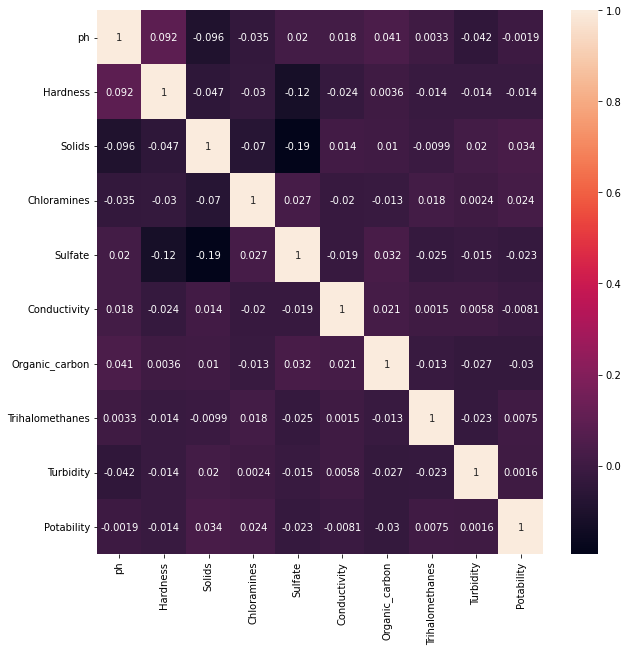

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(scaled_preprocessed_data.corr(), annot=True)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_preprocessed_data.iloc[:, :-1], scaled_preprocessed_data.iloc[:,-1], test_size = 0.2)

In [ ]:
X_train

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
518,-1.401013,-0.820455,0.805037,2.267564,-1.005872,0.507513,0.492430,-2.701660,0.409724
622,-2.072807,0.213458,2.316931,0.902304,-1.482407,0.959357,-0.159066,-1.268952,0.272818
57,-1.413727,-0.185019,0.263455,0.068160,-0.239597,-0.258312,-1.828609,2.095007,0.632989
3138,1.066484,-0.232941,-1.004448,-0.181701,0.044921,-0.328096,-1.087055,-1.423108,-0.413331
609,-0.100319,-0.785387,-0.507893,0.756823,0.431007,-0.640269,-0.996423,0.463492,-0.320567
...,...,...,...,...,...,...,...,...,...
237,-0.097142,-0.571605,-1.070793,0.163381,0.230961,0.166064,-1.492512,1.063550,-0.311044
3051,1.210371,-0.447276,-0.518863,0.005956,0.628622,1.273094,0.346302,-0.366972,2.296519
1905,-0.076737,-0.378285,-0.982414,-0.419871,1.049321,0.087046,0.090475,-0.023078,1.187329
2909,0.575964,1.061080,-0.521177,-0.524675,-0.033890,-0.460322,-0.122517,1.849301,-0.709008


In [ ]:
y_train

518     0
622     0
57      0
3138    1
609     0
       ..
237     0
3051    0
1905    1
2909    0
1475    0
Name: Potability, Length: 2620, dtype: int64

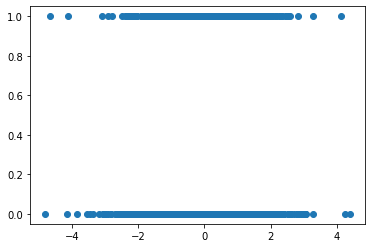

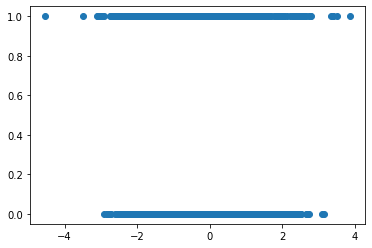

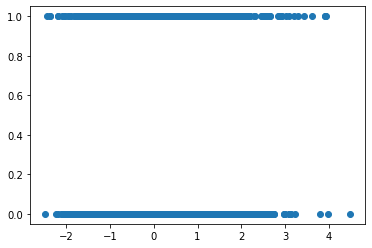

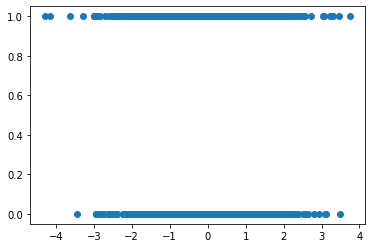

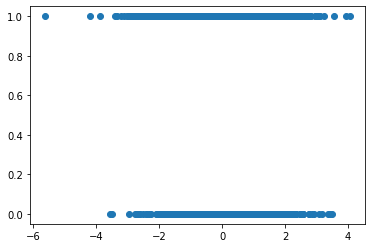

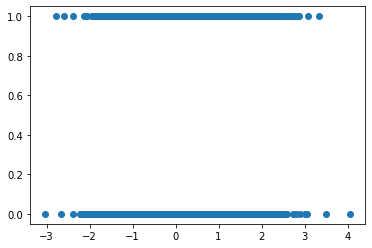

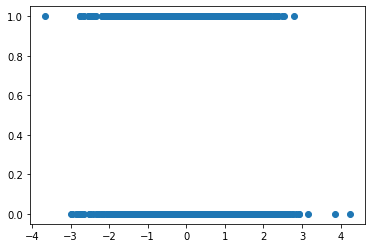

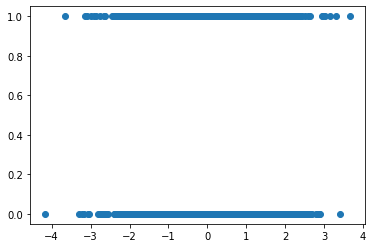

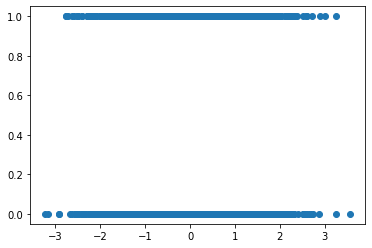

In [ ]:
for column in X_train.columns:

  x = X_train[column]
  y = y_train
  plt.scatter(x,y)
  plt.show()

In [ ]:
scaled_preprocessed_data[ "Potability"]

0       0
1       0
2       0
3       0
4       0
       ..
3271    1
3272    1
3273    1
3274    1
3275    1
Name: Potability, Length: 3276, dtype: int64

In [ ]:
X_train.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity'],
      dtype='object')

4.69956572112444 60.98901098901099


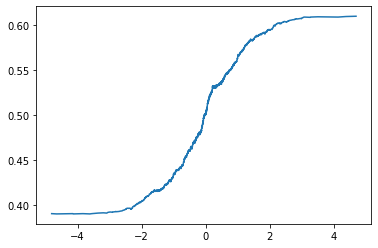

2.4855540553702187 61.2942612942613


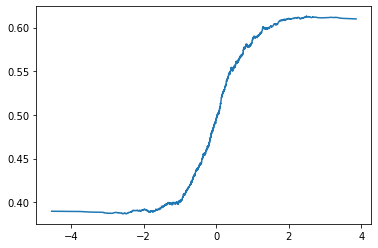

2.7446821075545818 61.233211233211236


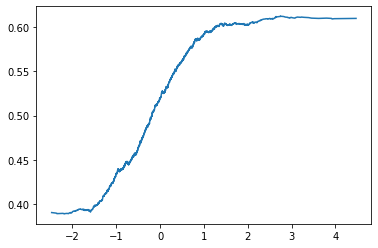

2.330402071576838 61.26373626373627


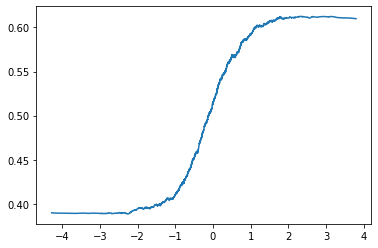

2.301314155671128 61.568986568986574


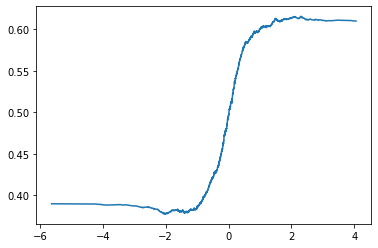

3.0484670568416927 60.98901098901099


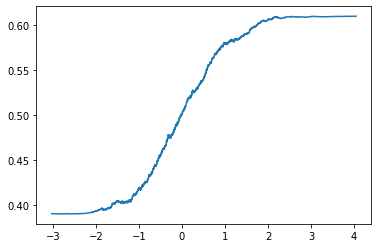

4.237147180794109 60.98901098901099


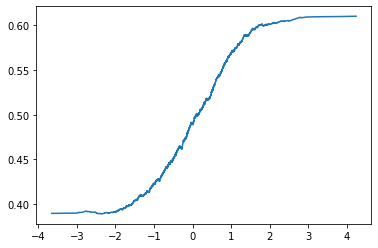

2.9184930417446497 61.111111111111114


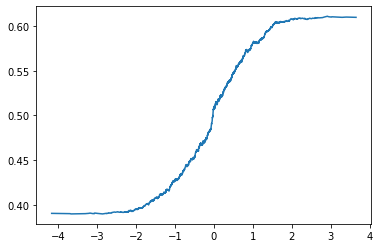

2.688545133527095 61.01953601953603


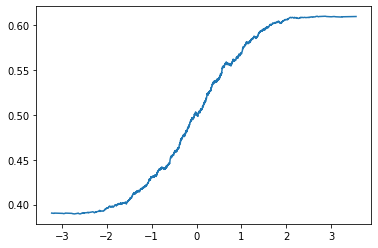

In [ ]:
for feature in X_train.columns:
  decision = np.sort(scaled_preprocessed_data[feature].unique())
  acc = []
  for king in decision:
    predict = np.array([scaled_preprocessed_data[feature] > king]).astype(int)
    acc.append(np.sum((predict == np.array(scaled_preprocessed_data[ "Potability"])).astype(int)) / len(np.array(scaled_preprocessed_data[ "Potability"])))
  print(decision[np.argmax(np.array(acc))], max(acc)*100)
  dec_value = decision[np.argmax(np.array(acc))]
  plt.plot(decision, acc)
  plt.show()

# 1.PCA

###Principal Component analysis is a common technique used for dimensionality reduction. It takes into account varience of the features without considering the effect the features ahve on the target value. 

After PCA the expalined varience ratio i.e percent of varience explained by each of the Prinicipal components. For our data:

[ph	Hardness	Solids	Chloramines	Sulfate	Conductivity	Organic_carbon	Trihalomethanes	Turbidity]

[0.13876337 0.12886566 0.11734319 0.1137457  0.11043887 0.10763871
 0.10551548 0.09613842 0.0815506]

It shows that varience of each feature is similar and elimination based on PCA will not be as effective.





In [ ]:
scaled_preprocessed_data["Potability"].value_counts

<bound method IndexOpsMixin.value_counts of 0       0
1       0
2       0
3       0
4       0
       ..
3271    1
3272    1
3273    1
3274    1
3275    1
Name: Potability, Length: 3276, dtype: int64>

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
scaled_preprocessed_data_x = scaled_preprocessed_data.drop(columns=["Potability"], axis=1)
scaled_preprocessed_data_y = scaled_preprocessed_data["Potability"]
myPCAModel = PCA().fit(scaled_preprocessed_data_x)
scaled_pca_preprocessed_data_x = myPCAModel.transform(scaled_preprocessed_data_x)
pca_columns = ["PCA_%x" %x for x in range(scaled_preprocessed_data_x.shape[1])]
scaled_pca_preprocessed_data_x_df = pd.DataFrame(scaled_pca_preprocessed_data_x, columns=pca_columns, index=scaled_preprocessed_data_x.index)

In [ ]:
# print(scaled_pca_preprocessed_data_x_df)
print(myPCAModel.explained_variance_ratio_)

#all principle components explain equal variance

[0.13876337 0.12886566 0.11734319 0.1137457  0.11043887 0.10763871
 0.10551548 0.09613842 0.0815506 ]


#2.SMOTE

### Synthetic Minority Oversampling Technique (SMOTE) is a method for sampling unbalaenced datset.
The data is unbalanced where 60% of labels are portable water and 40% of the datapoints are non-proable water.

By oversampling the minority class we hope to achieve better peformance. 
After SMOTE for sampling only the trained data is modified and is further used for Random Forest and XGBoost

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV

In [ ]:
# print(scaled_preprocessed_data_x.head())
print(scaled_preprocessed_data_y.head())

0    0
1    0
2    0
3    0
4    0
Name: Potability, dtype: int64


In [ ]:
#split the data into train test split
# myGridModel = GridSearchCV()
xTrain, xTest, yTrain, yTest = train_test_split(scaled_preprocessed_data_x, scaled_preprocessed_data_y, test_size=0.3, random_state=42)
# myRandomForestModel = RandomForestClassifier(random_state=42, n_jobs=16)
# myParameters = {'n_estimators': [400, 800, 1200],
#                'max_features': ['auto'],
#                'max_depth': [50, 75, 100, 150, None],
#                'min_samples_split': [2,5,10],
#                'criterion': ['gini', 'entropy']
#             }
# # myRandomForestFit = myRandomForestModel.fit(xTrain, yTrain)
# myGridModel = GridSearchCV(myRandomForestModel, myParameters, cv=3, n_jobs=16, verbose=4, scoring='f1')
# myModel = myGridModel.fit(xTrain, yTrain)

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
print(scaled_preprocessed_data["Potability"].value_counts())

0    1998
1    1278
Name: Potability, dtype: int64


In [ ]:
mySmote = SMOTE()
xTrain, yTrain = mySmote.fit_resample(xTrain, yTrain)

In [ ]:
print(yTrain.value_counts())

0    1381
1    1381
Name: Potability, dtype: int64


###  neural networks used to encode data to do feature selection will need higher dimensionality to beign with 

When the data is tabular and with only 3072 instances and 9 features neural networks will thend to overfit and fail to generalize.

Even a simple 2 layer model input nodes 9, hidden nodes 5, output nodes 1 will have 50 weights to be fitted. This model will always fail to generailse given the limited data.

#3.RandomForest



##### Unlike for a image data where pretraining on unrelated image data has shown to improve results drastically for tabular data sets transfer learning is not as common place unless dataset are similar enough. So introducing neural network architechture proves to be challenging

Randon forest is a common classification algorithm used. It is not as prone to overfitting as decision trees. It is a technique where multiple decision tress are ensamble to give out a prediction.

CV grid search was used to find the optimum parameters of random forest.


In [ ]:
myRandomForestModel = RandomForestClassifier(random_state=42, n_jobs=16)
myParameters = {'n_estimators': [400, 800, 1200],
               'max_features': ['auto'],
               'max_depth': [50, 75, 100, 150, None],
               'min_samples_split': [2,5,10],
               'criterion': ['gini', 'entropy']
            }
# myRandomForestFit = myRandomForestModel.fit(xTrain, yTrain)
myGridModel = GridSearchCV(myRandomForestModel, myParameters, cv=3, n_jobs=16, verbose=4, scoring='f1')
myModel = myGridModel.fit(xTrain, yTrain)

Fitting 3 folds for each of 90 candidates, totalling 270 fits


In [ ]:
myPredictions = myGridModel.predict(xTest)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
myClassificationReport = classification_report(yTest, myPredictions)

In [ ]:
print(myClassificationReport)

              precision    recall  f1-score   support

           0       0.72      0.76      0.74       617
           1       0.55      0.50      0.53       366

    accuracy                           0.66       983
   macro avg       0.64      0.63      0.63       983
weighted avg       0.66      0.66      0.66       983



In [ ]:
myGridModel.best_params_

{'criterion': 'entropy',
 'max_depth': 50,
 'max_features': 'auto',
 'min_samples_split': 5,
 'n_estimators': 800}

#4. GaussianNB

##### naive bayes classifier

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
myGaussModel = GaussianNB()
yPredicted = myGaussModel.fit(xTrain, yTrain).predict(xTest)


In [ ]:
myClassificationReport = classification_report(yTest, yPredicted)
print(myClassificationReport)

              precision    recall  f1-score   support

           0       0.68      0.65      0.66       617
           1       0.45      0.48      0.46       366

    accuracy                           0.59       983
   macro avg       0.56      0.56      0.56       983
weighted avg       0.59      0.59      0.59       983



#5. XGBOOST

##### Extreme Gradient boost

Gradient boosting is an approach where new models are created that predict the residuals or errors of prior models and then added together to make the final prediction. It is called gradient boosting because it uses a gradient descent algorithm to minimize the loss when adding new models.

In [ ]:
import xgboost as xgb

In [ ]:
myXGBModel = xgb.XGBClassifier()
myFit = myXGBModel.fit(xTrain, yTrain)
myPredict = myXGBModel.predict(xTest)

In [ ]:
myClassRep = classification_report(yTest, myPredict)

In [ ]:
print(myClassRep)

              precision    recall  f1-score   support

           0       0.72      0.66      0.69       617
           1       0.50      0.56      0.53       366

    accuracy                           0.62       983
   macro avg       0.61      0.61      0.61       983
weighted avg       0.63      0.62      0.63       983



#6. LDA

##### LDA Linear Discriminant Analysis will give out a single vector for binary classification. That single vector is used for classification. 

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [ ]:
myLDAModel = LinearDiscriminantAnalysis().fit(xTrain, yTrain)

In [ ]:
# print(myLDAModel)

In [ ]:
myPredict = myLDAModel.predict(xTest)

In [ ]:
myClassificationReport = classification_report(yTest, myPredict)

In [ ]:
print(myClassificationReport)

              precision    recall  f1-score   support

           0       0.65      0.55      0.59       617
           1       0.39      0.49      0.44       366

    accuracy                           0.53       983
   macro avg       0.52      0.52      0.52       983
weighted avg       0.55      0.53      0.54       983



#7. KNN Classifier

##### K-nearest neighbour (KNN) is another straightforward algorithm where the datapoints surrounding a test datapoint infulence the prediction. This algorithm has only 1 parameter which is k which is the number of neighbours to be considered. The value of k will dictate the complexity of the model.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
myModel = KNeighborsClassifier(n_neighbors=7, n_jobs=-1)
myKnnFit = myModel.fit(xTrain, yTrain)
myPredict = myModel.predict(xTest)

In [ ]:
from sklearn.metrics import classification_report
myClassificationReport = classification_report(yTest, myPredict)
print(myClassificationReport)

              precision    recall  f1-score   support

           0       0.70      0.65      0.67       617
           1       0.47      0.53      0.50       366

    accuracy                           0.60       983
   macro avg       0.58      0.59      0.58       983
weighted avg       0.61      0.60      0.61       983

